In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

file_path = 'data/results.csv'
df = pd.read_csv(file_path, sep=';', names=['Algorithm', 'Threads', 'Update Ratio', "List Size", "Range", 'Throughput'])
df.head()

,Algorithm,Threads,Update Ratio,List Size,Range,Throughput
0,CoarseGrainedListBasedSet,1,0,100,200,1.100886e+07
1,CoarseGrainedListBasedSet,1,0,1000,2000,1.206843e+06
2,CoarseGrainedListBasedSet,1,0,10000,20000,4.771964e+04
3,CoarseGrainedListBasedSet,1,0,100,200,1.098594e+07
4,CoarseGrainedListBasedSet,1,0,1000,2000,1.198745e+06


In [92]:
df = df.set_index(['Algorithm', 'Update Ratio', 'List Size', 'Range'])
df.sort_index(inplace=True)

In [93]:
algorithms = ['CoarseGrainedListBasedSet',
              'HandOverHandListBasedSet',
              'HandOverHandListBasedSetOptimized',
              'LazyLinkedListSortedSet']

In [94]:
from itertools import product

In [95]:
xticks = df["Threads"].unique()

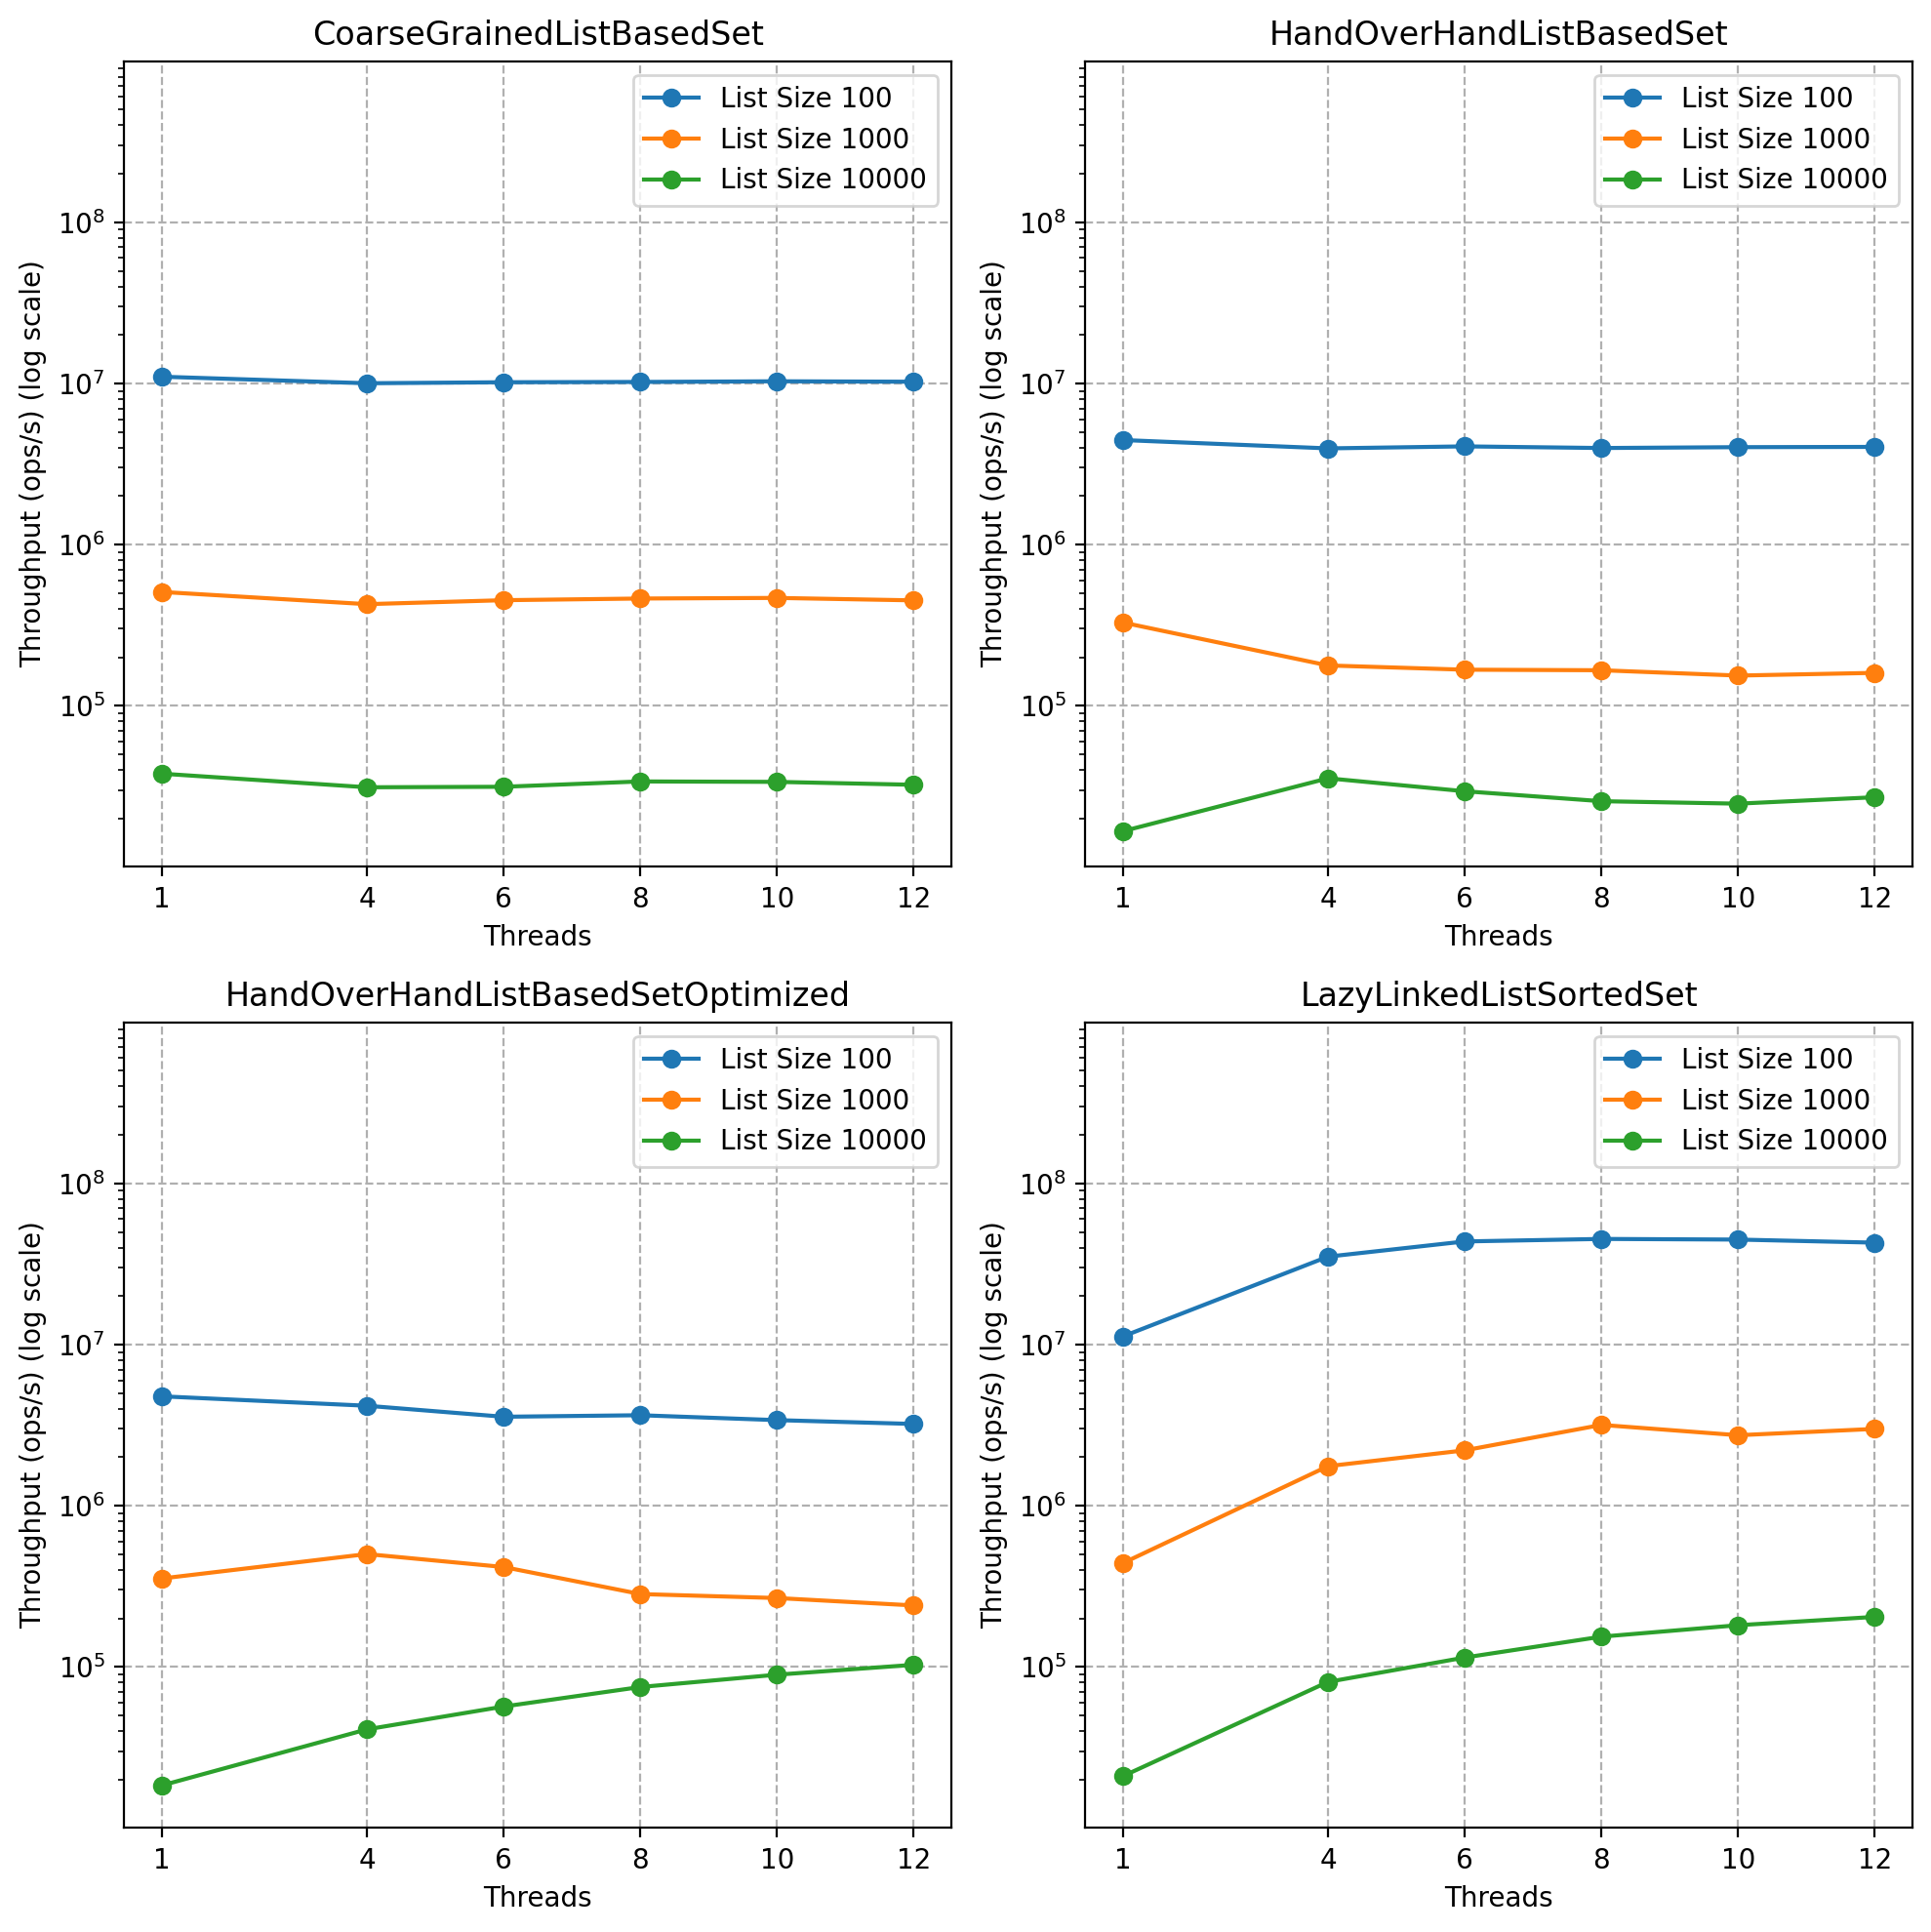

In [ ]:
list_sizes = [100, 1000, 10000]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
fig.set_dpi(200)

for ls, (alg, ax) in product(list_sizes, zip(algorithms, axes.flatten())):
    df.loc[(alg, 10, ls, 2 * ls)].plot(
        x='Threads', y='Throughput',
        title=alg, 
        label=f'List Size {ls}',
        logy=True, 
        marker='o', 
        ax=ax
    )

for ax in axes.flatten():
    ax.set_xlabel('Threads')
    ax.set_ylabel('Throughput (ops/s) (log scale)')
    ax.legend(loc='upper right')
    ax.set_xticks(xticks)
    ax.set_ylim((10**4, 10**9))
    ax.set_yticks([10**5, 10**6, 10**7, 10**8])
    ax.grid(True, ls='--')

fig.tight_layout()

plt.savefig("list-size.png", format="png", bbox_inches="tight")

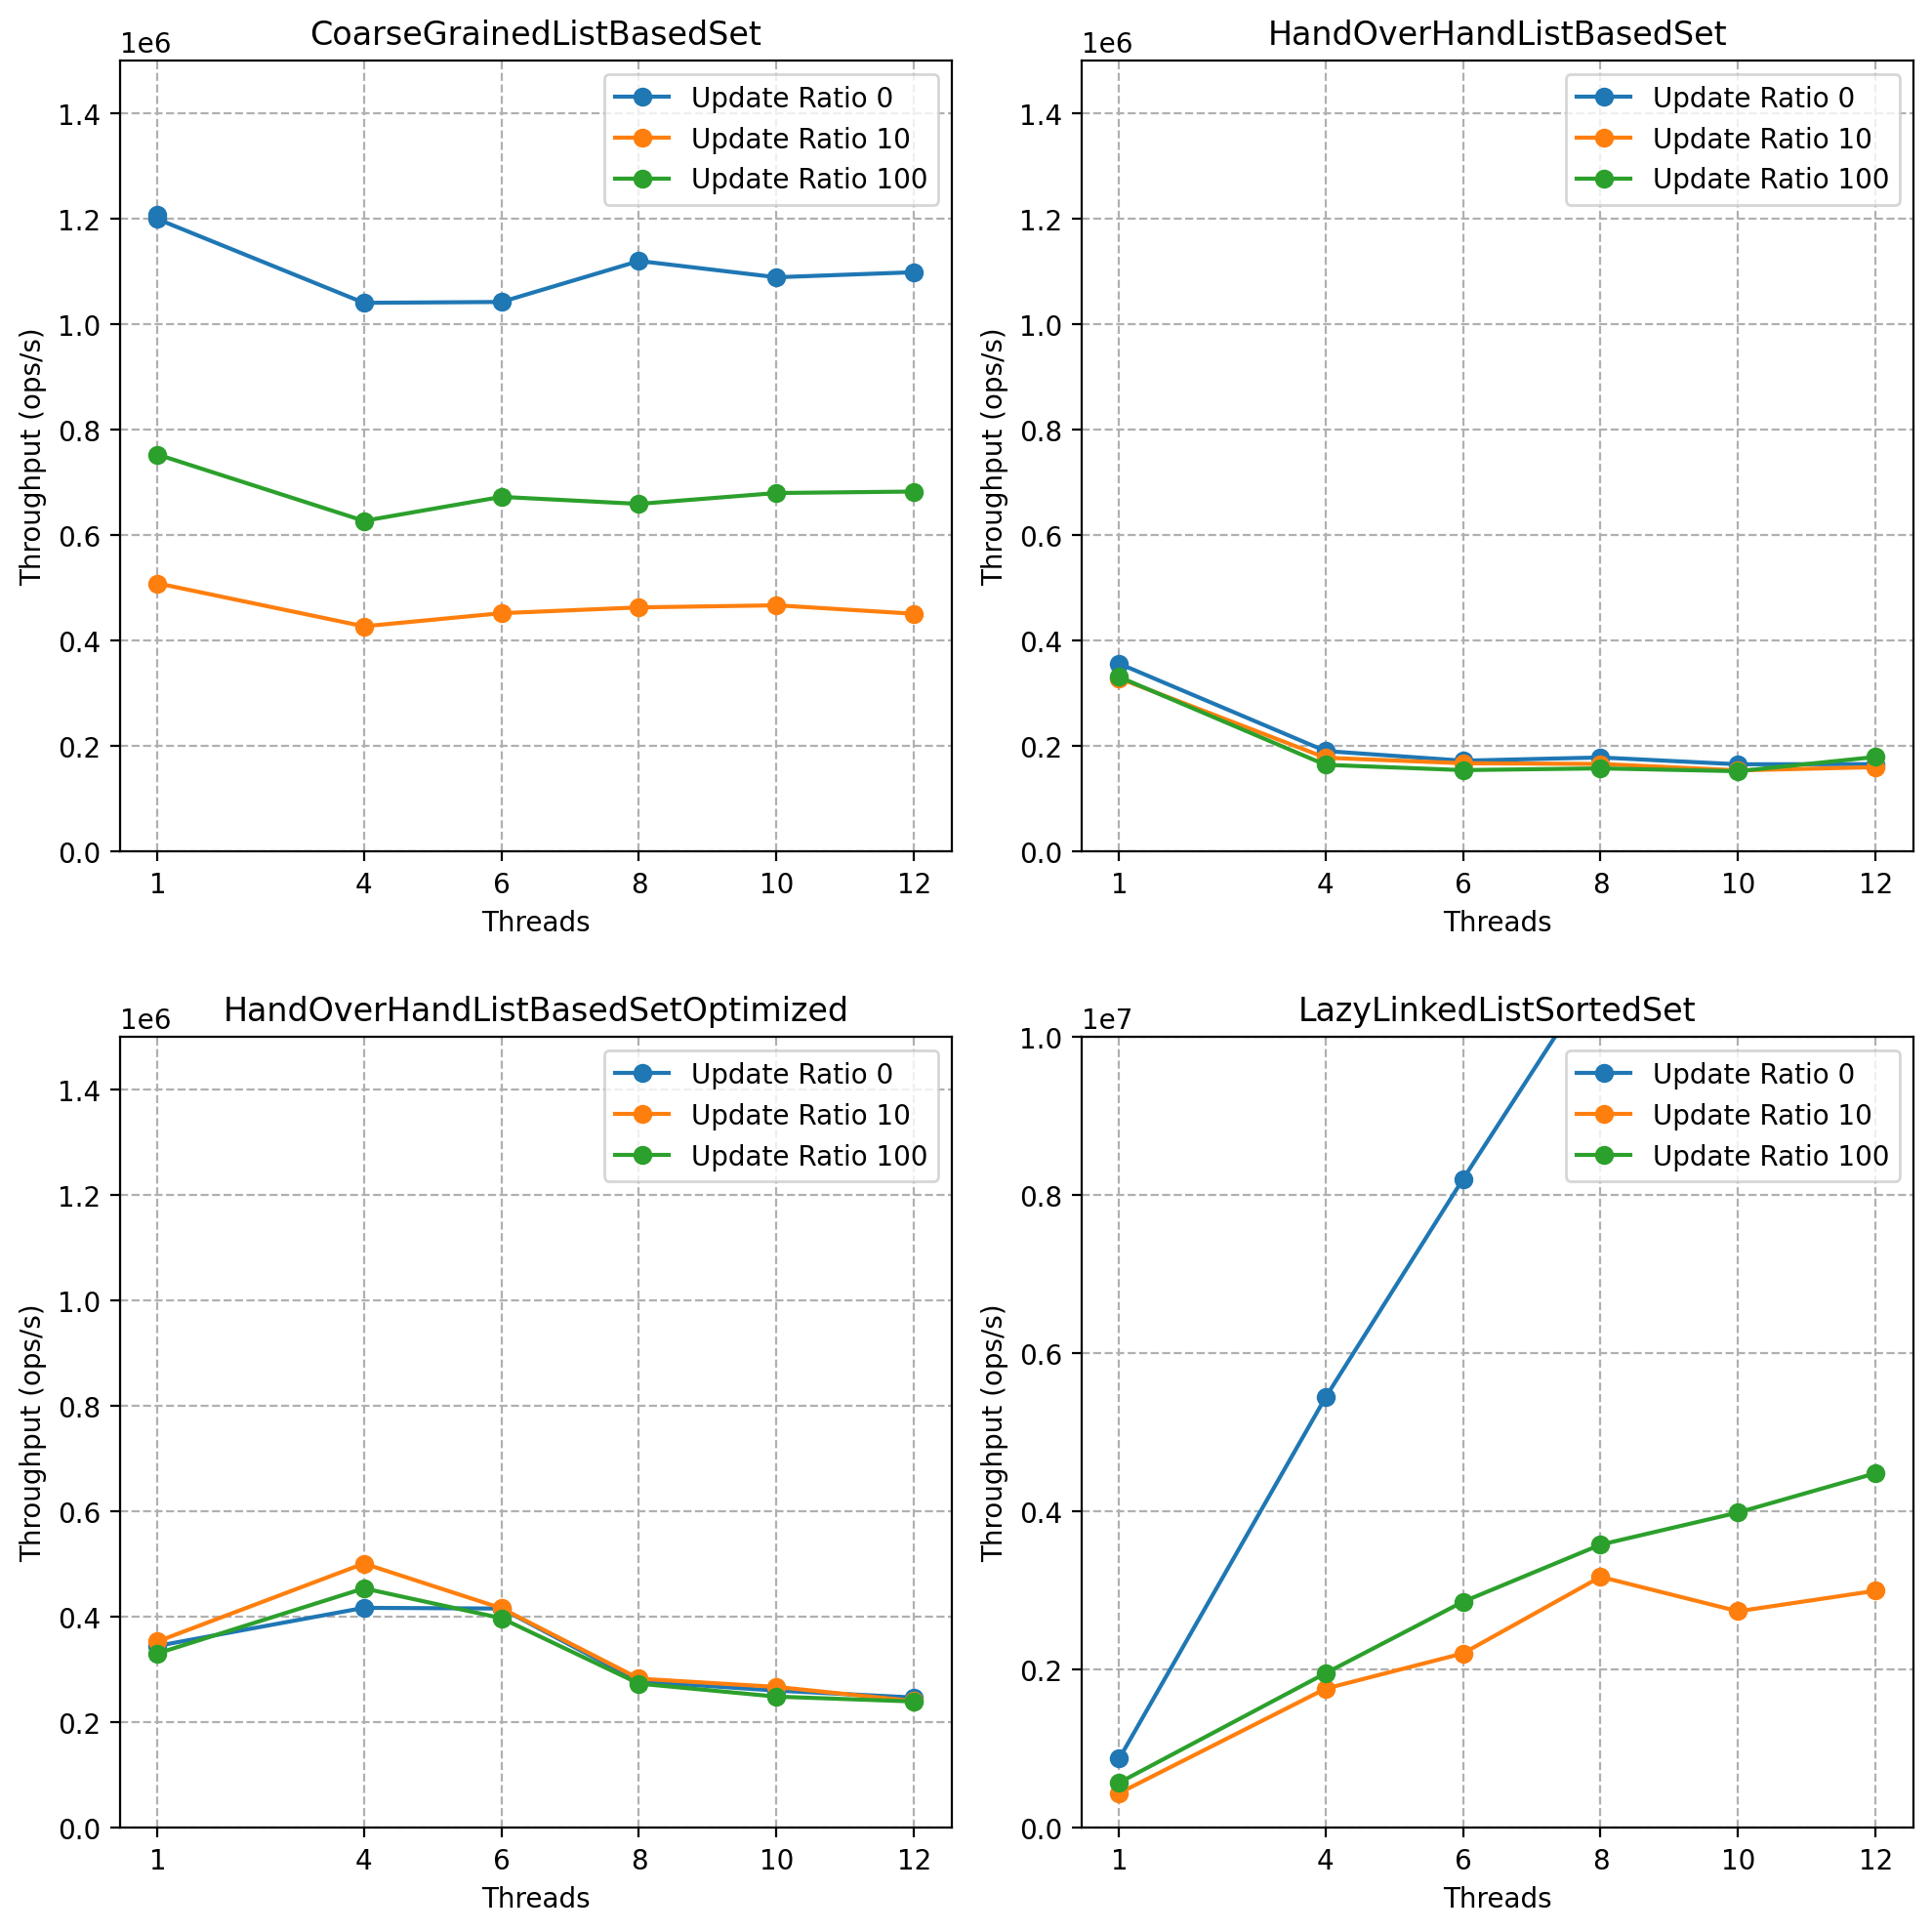

In [ ]:
update_ratios = [0, 10, 100]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
fig.set_dpi(200)

for ur, (alg, ax) in product(update_ratios, zip(algorithms, axes.flatten())):
    df.loc[(alg, ur, 1000, 2000)].plot(
        x='Threads', y='Throughput',
        title=alg, 
        label=f'Update Ratio {ur}',
        logy=False, 
        marker='o', 
        ax=ax
    )

for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel('Threads')
    ax.set_ylabel('Throughput (ops/s)')
    ax.legend(loc='upper right')
    ax.set_xticks(xticks)
    ax.set_ylim((0, 1.5 * 10**6 if i < 3 else 10**7))
    ax.grid(True, ls='--')

fig.tight_layout()
plt.savefig("update-ratio.png", format="png", bbox_inches="tight")

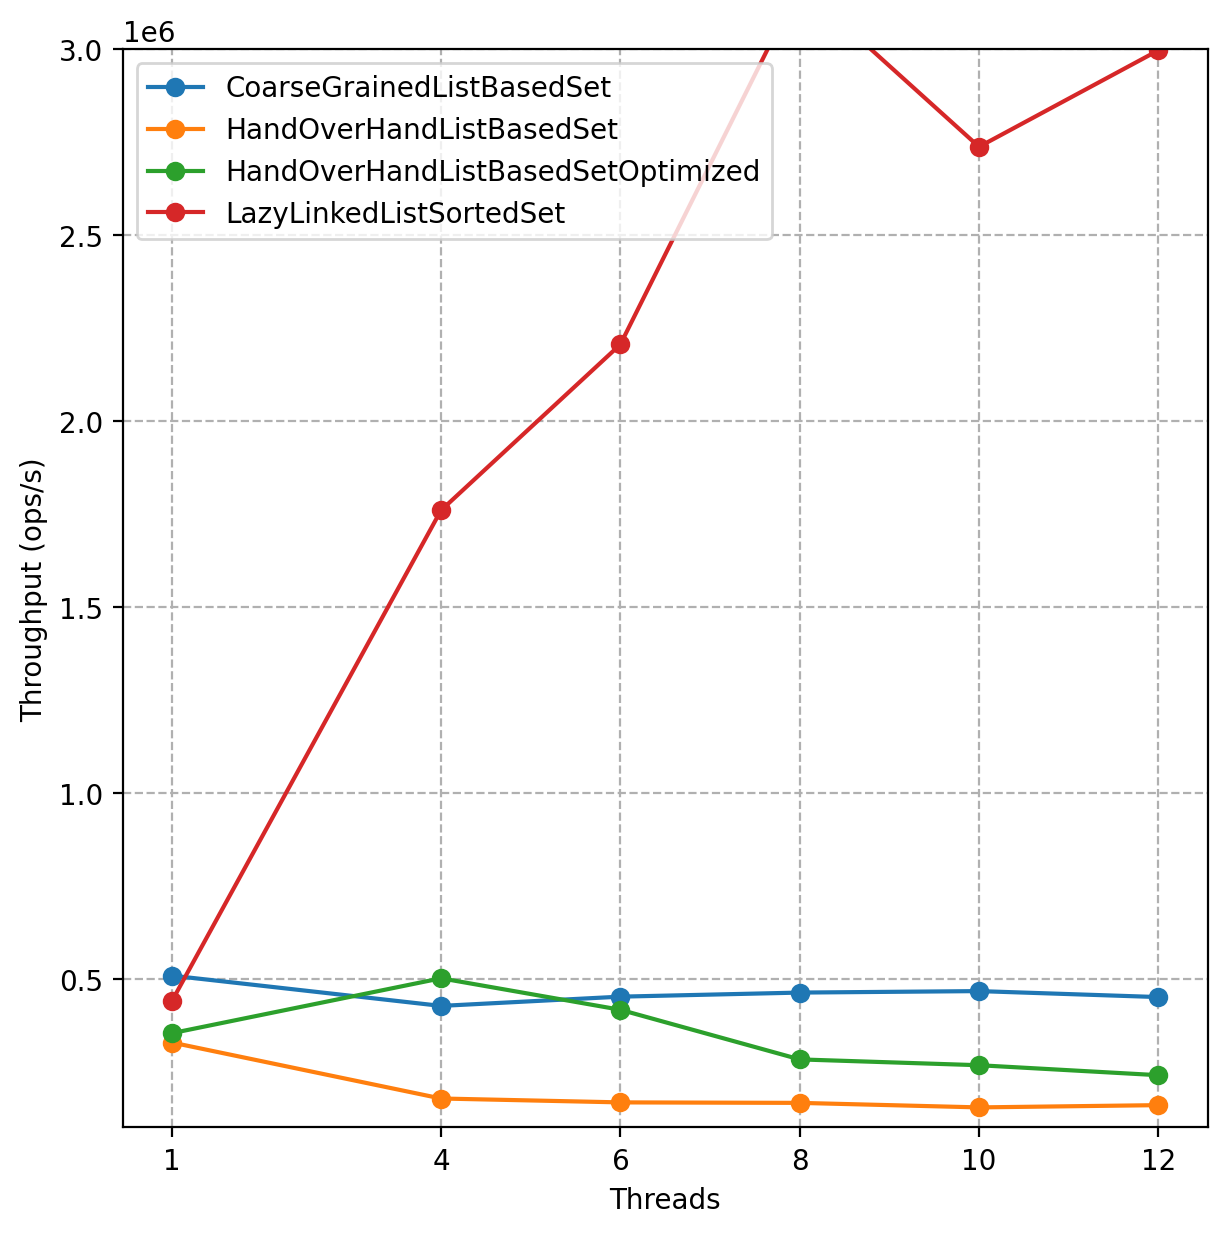

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
fig.set_dpi(200)

for alg in algorithms:
    df.loc[(alg, 10, 1000, 2000)].plot(
        x='Threads', y='Throughput',
        label=alg,
        logy=False, 
        marker='o', 
        ax=ax
    )

ax.set_xticks(xticks)
ax.set_ylim((10**5, 3 * 10**6))
ax.set_ylabel('Throughput (ops/s)')
ax.legend(loc='upper left')
ax.grid(True, ls='--')

plt.savefig("algorithm.png", format="png", bbox_inches="tight")